# Problem Description¶


- This dataset consists of reviews of fine foods from amazon. The data span a period of more than 10 years, including more than 500,000 reviews up to October 2012. Reviews include product and user information, ratings, and a plain text review. It also includes reviews from all other Amazon categories.


- Data includes:

    - Reviews from Oct 1999 - Oct 2012
    - 568,454 reviews
    - 256,059 users
    - 74,258 products
    - 260 users with > 50 reviews
    

- Dataset link : https://www.kaggle.com/snap/amazon-fine-food-reviews?select=Reviews.csv

In [209]:
import pandas as pd
import numpy as np

# Visualization Packages
import seaborn as sns
import matplotlib.pyplot as plt
#sns.set(font_scale=1.3)
%matplotlib inline

In [136]:
df = pd.read_csv("Z:\\Ziad\college\\Summer training\\food reviews\\Reviews.csv")
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


# 1: Data wrangling

1.1- Check duplicates in the data.

In [138]:
df.duplicated().sum()

0

1.2- Remove irrelevent data that will not be effecient in our analysis

In [139]:
df.drop(['Id','ProfileName','Time','Summary'],axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   ProductId               568454 non-null  object
 1   UserId                  568454 non-null  object
 2   HelpfulnessNumerator    568454 non-null  int64 
 3   HelpfulnessDenominator  568454 non-null  int64 
 4   Score                   568454 non-null  int64 
 5   Text                    568454 non-null  object
dtypes: int64(3), object(3)
memory usage: 26.0+ MB


1.3- Check if there's any null values

In [140]:
print(df.isnull().sum())

ProductId                 0
UserId                    0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Text                      0
dtype: int64


1.4- Rename some columns names to ease accessing and reading them

In [141]:
df.rename(columns={'HelpfulnessNumerator':'liked_users',
                   'HelpfulnessDenominator':'total_users'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ProductId    568454 non-null  object
 1   UserId       568454 non-null  object
 2   liked_users  568454 non-null  int64 
 3   total_users  568454 non-null  int64 
 4   Score        568454 non-null  int64 
 5   Text         568454 non-null  object
dtypes: int64(3), object(3)
memory usage: 26.0+ MB


In [142]:
df.head(2)

,ProductId,UserId,liked_users,total_users,Score,Text
0,B001E4KFG0,A3SGXH7AUHU8GW,1,1,5,I have bought several of the Vitality canned d...
1,B00813GRG4,A1D87F6ZCVE5NK,0,0,1,Product arrived labeled as Jumbo Salted Peanut...


1.5 Check if there's error in the data, checks if there's a row that have zero of total users who reviewd, or if there's a row that have liked users number > total users

In [143]:
c = 0
for i,j in zip(df['liked_users'],df['total_users']):
    if i > j or (j ==0 and i !=0):
        df.drop(index=c, inplace=True)
    c += 1


1.5- Now the data is clear, cleaned and ready for analysis, Just saving it

In [75]:
df.to_csv('cleaned_reviews_data.csv')

# 2: Data analysis

### Univariate analysis questions:
1- what's the counts / frequency of each score in our data?


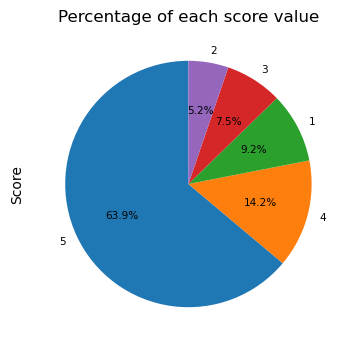

In [144]:
order_counts = df['Score'].value_counts()

order_counts.plot(kind='pie', figsize=(4, 4), autopct='%1.1f%%', 
                  startangle=90, textprops={'fontsize': 7.5})

plt.title("Percentage of each score value")

plt.show()

Conclusion: Most of the foods in the data are rated with 5, which indicates that there's a customer satisfaction

2- What's the summary statistics of the scores (min value, max value, median value,..)

In [145]:
df['Score'].describe()

count    568452.000000
mean          4.183198
std           1.310438
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: Score, dtype: float64

Conclusion: As we can see the median, Q3, max value = 5 and the Q1 =4

Which ensures that the foods are acceptable by the customers.

3- What's the distribution of the socres

Text(0, 0.5, 'Frequency')

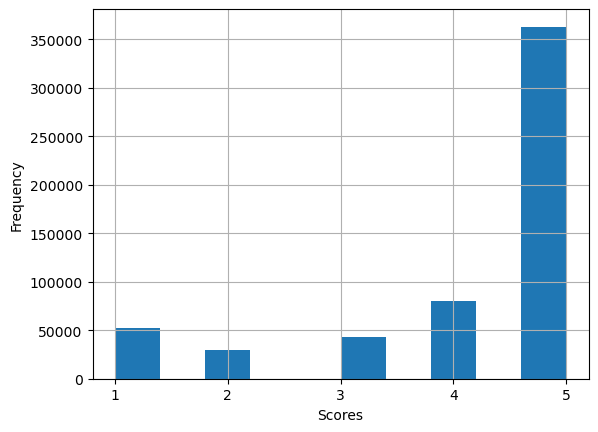

In [146]:
df['Score'].hist()
plt.xticks([1, 2, 3, 4, 5])
plt.xlabel('Scores')
plt.ylabel('Frequency')

4- What's the summary statistics of the liked_users (min value, max value, median value,..)

In [147]:
df['liked_users'].describe()

count    568452.000000
mean          1.743813
std           7.636526
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         866.000000
Name: liked_users, dtype: float64

Conclusion: 
- Mean: 1.74 suggests that, on average, the number of users who liked the food is around 1-2.

- The fact that the 75th percentile is 2 and the max is 866 shows significant right skewness in the data.

# Bivariate analysis:

1- What's the corr between the attributes and each others?

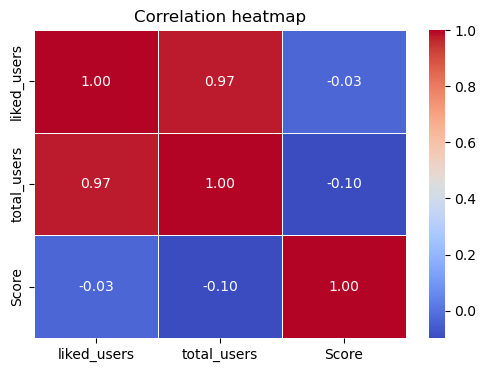

In [179]:
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation heatmap')
plt.show()

- As we saw above, there's a great impact if the liked users number increases, the total number of reviewd users increases.

- The scores don't affect the number of liked users or the total number of users, there's no any correlation

# 3- Data modelling

<AxesSubplot:xlabel='Target', ylabel='count'>

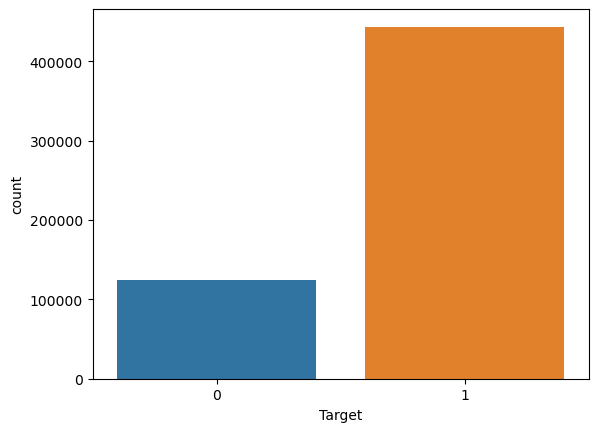

In [192]:
df['Target'] = df['Score'].apply(lambda x: 1 if x >= 4 else 0)
sns.countplot(x = "Target" , data = df)

<AxesSubplot:xlabel='Target', ylabel='count'>

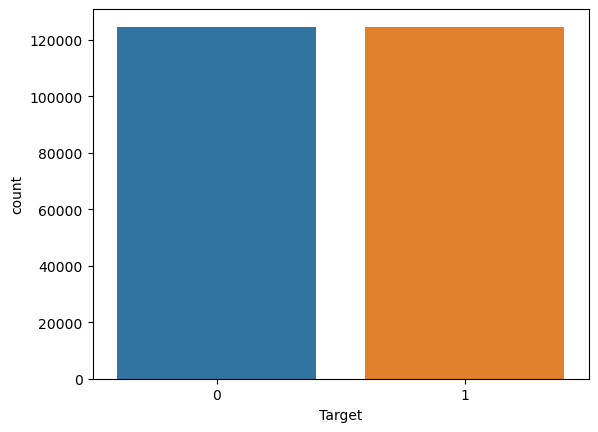

In [204]:
zeros = df['Target'].value_counts()[0]
zero_target = df[df['Target'] == 0].sample(zeros, replace = False)
one_target = df[df['Target'] == 1].sample(zeros, replace = False)
data_balanced = pd.concat([one_target, zero_target])

sns.countplot(x = 'Target', data = data_balanced)

In [208]:
import nltk
from nltk.corpus import stopwords

stop = stopwords.words('english')

data_balanced["Text"] = data_balanced["Text"].str.lower()
data_balanced["Text"] = data_balanced["Text"].apply(lambda x: re.sub(r"(@[A-Za-z0-9\d+]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", x))
data_balanced["Text"] = data_balanced["Text"].apply(lambda x: " ".join([i for i in x.split() if i not in stop]))

data_balanced.head()

,ProductId,UserId,liked_users,total_users,Score,Text,Target
429226,B0025UACSS,A3SSBBEGNC7G07,1,1,5,excellent tartar sauce satisfactory situationb...,1
298336,B004E4ADKU,AAS81F5AG6DVD,0,0,4,first let say agree reviewers color chemicals ...,1
28978,B001ACNWY8,A21LU0YXHRSNY8,0,0,5,always staple housebr makes great unique sandw...,1
562229,B004HOSGWE,AOSYECY7F2T3R,1,3,5,took two three cans love first tried thought t...,1
471746,B000GZW9RQ,A1XYSXTKT6OR7R,1,1,5,thai peanut perfect gluten free meal easy quic...,1


In [210]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
import re

In [226]:
# Split the dataset into features (X) and target (y)
X = data_balanced["Text"]
y = data_balanced["Target"]

# Convert text data into numerical features using TF-IDF vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

# Split the dataset into training (60%), validation (40%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the datasets
print("Training set size:", X_train.shape)
print("Validation set size:", X_val.shape)
print("Test set size:", X_test.shape)

# Create a logistic regression model
model = LogisticRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Evaluate the model on the validation set
y_val_pred = model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)

# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)


Training set size: (199483, 151536)
Validation set size: (24935, 151536)
Test set size: (49871, 151536)
Validation Accuracy: 0.8822538600360939
Test Accuracy: 0.8705660604359247


C:\Users\ziad_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [230]:
precision = precision_score(y_test, y_test_pred)

# Calculate recall
recall = recall_score(y_test, y_test_pred)

print("Precision:", precision*100)
print("Recall:", recall*100)

Precision: 87.4292231862805
Recall: 86.43282860824742


In [235]:
def raw_test(text, model, vectorizer):
    transformed_text = vectorizer.transform([text])
    prediction = model.predict(transformed_text)
    return "Positive" if prediction[0] == 1 else "Negative"

# Test data
review_1 = "That's a good Dish, Good Job"
review_2 = "That's the worst Dish ever tasted"

# Predictions
print("Row 1 is", raw_test(review_1, model, vectorizer))  # Expected: Positive
print("Row 2 is", raw_test(review_2, model, vectorizer))  # Expected: Negative

Row 1 is Positive
Row 2 is Negative



# Saving Models for Deployment


In [51]:
import pickle

model_name = 'model.pk'
vectorizer_name = 'vectorizer.pk'
model_path = os.path.join('/', model_name)
vect_path = os.path.join('/', vectorizer_name)

pickle.dump(clf, open(model_name, 'wb'))
pickle.dump(vectorizer, open(vectorizer_name, 'wb'))

In [30]:
loaded_model = pickle.load(open(model_name, 'rb'))
loaded_vect = pickle.load(open(vectorizer_name, 'rb'))